In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn


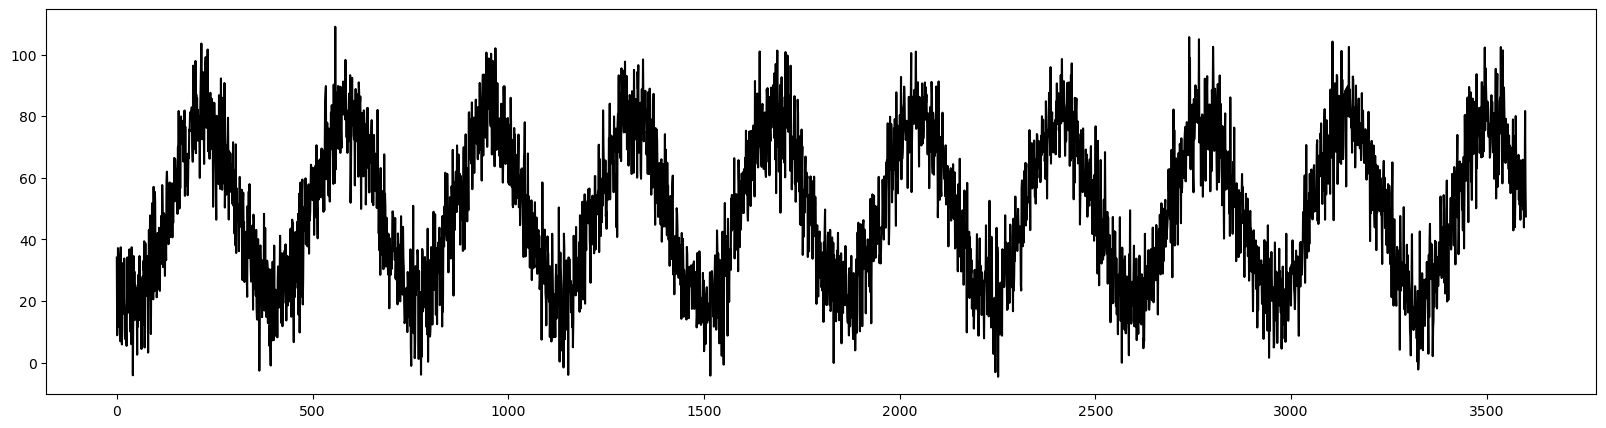

In [29]:
Ndays=3600       #number of days to simulat
T = 365.25       #period of the annual cycle (days)
A = 30           #amplitude of annual cycle
phase = 130      # phase shift (to the sine to start at the right point)
mu    = 50       # mean temperature
sig= 30          # spread of weather

T=A*np.sin(2*np.pi*(t-phase)/T) + stats.norm.rvs(loc=mu,scale=sig,size=N)

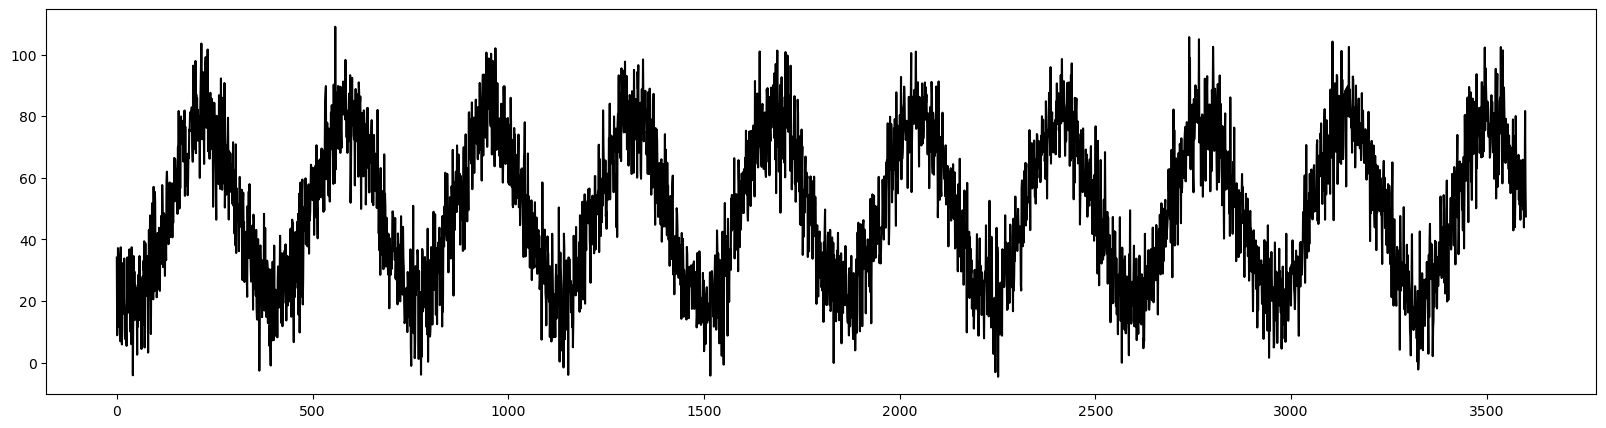

In [30]:
plt.figure(figsize=[20,5])
t=np.linspace(0,N,N)
plt.plot(t,T,'k')

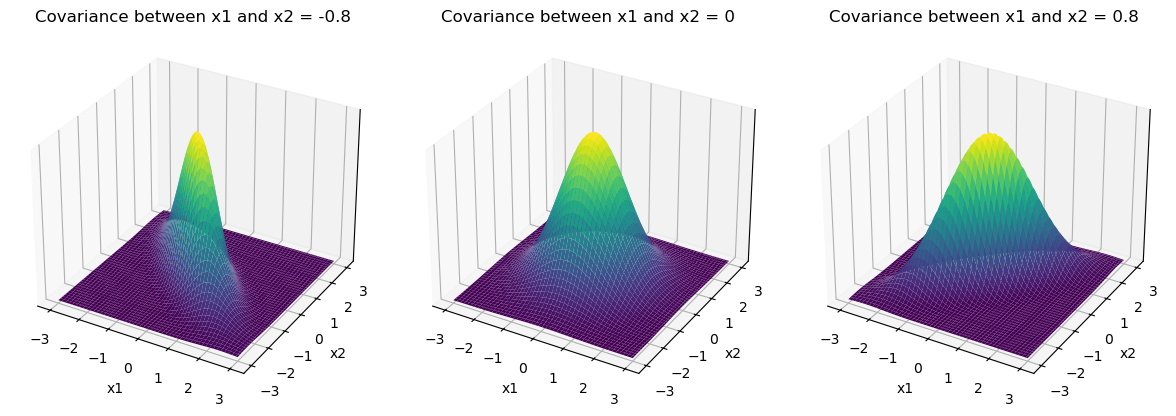

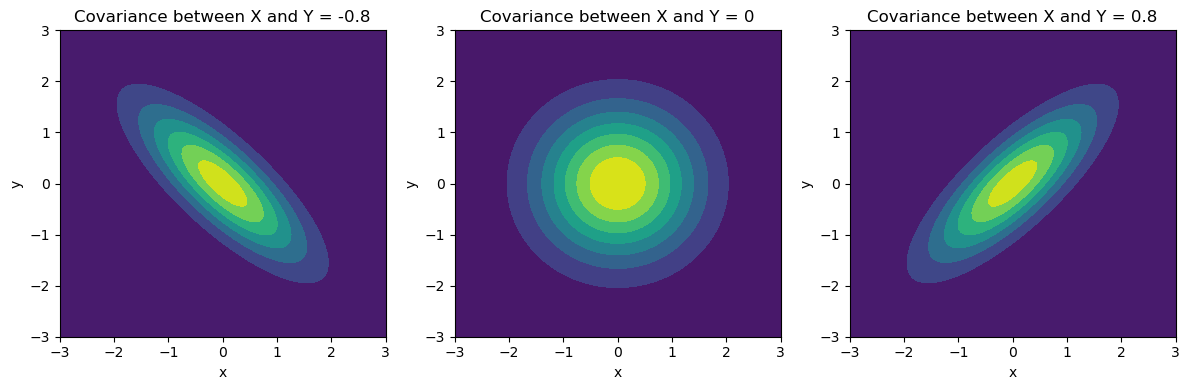

In [46]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.rcParams['figure.figsize']=12,4
fig = plt.figure()
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino 
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for 
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-3*sigma_1, 3*sigma_1, num=100)
    y = np.linspace(-3*sigma_2, 3*sigma_2, num=100)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    # Plotting the density function values
    key = 131+idx
    ax = fig.add_subplot(key, projection = '3d')
    ax.plot_surface(X, Y, pdf, cmap = 'viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f'Covariance between x1 and x2 = {val}')
    pdf_list.append(pdf)
    ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()
 
# Plotting contour plots
for idx, val in enumerate(pdf_list):
    plt.subplot(1,3,idx+1)
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f'Covariance between X and Y = {cov_val[idx]}')
plt.tight_layout()
plt.show()

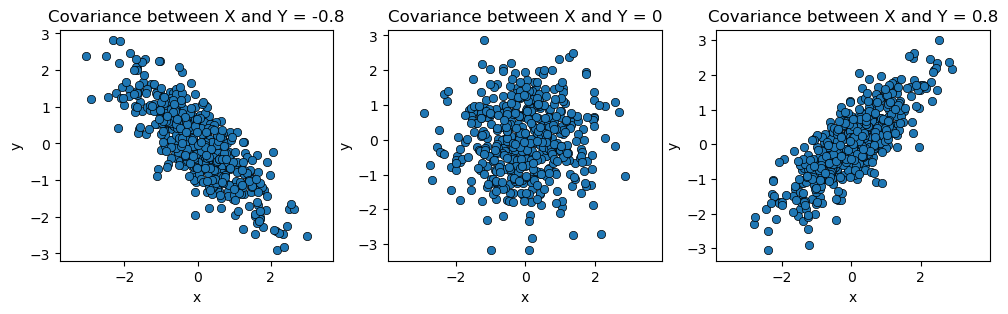

In [44]:
# Importing the necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
 
 
plt.rcParams['figure.figsize']=12,3
 
# Initializing the random seed
random_seed=1000
 
# List containing the variance 
# covariance values
cov_val = [-0.8, 0, 0.8]
 
# Setting mean of the distributino to 
# be at (0,0)
mean = np.array([0,0])
 
# Iterating over different covariance 
# values
for idx, val in enumerate(cov_val):
    plt.subplot(1,3,idx+1)
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating 5000 samples out of the
    # distribution
    data = distr.rvs(size = 500)
     
    # Plotting the generated samples
    plt.plot(data[:,0],data[:,1], 'o',
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
    plt.title(f'Covariance between X and Y = {val}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
     
plt.show()